# Loading and Setup

In [274]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [275]:
maven_df = pd.read_pickle('Data/maven_toys.pkl')

# Assessment

In [276]:
maven_df.tail()

,Store_Location,Store_Name,Product_Category,Product_Price,Product_Cost,Date,Units,Sale_Payment_Type,Product_Name,Customer_Satisfaction,Store_City,Sale_ID,Store_ID,Product_ID,Store_Open_Date,Customer_Reference
829257,Residential,Maven Toys Puebla 3,Art & Crafts,$2.99,$1.99,2018-05-15,3,credit,PlayDoh Can,9.0,Puebla,625020,44,25,2014-12-27,Social Media Ad
829258,Residential,Maven Toys Puebla 3,Games,$6.99,$3.99,2017-07-17,1,credit,Deck Of Cards,9.0,Puebla,217169,44,8,2014-12-27,Word of Mouth
829259,Residential,Maven Toys Puebla 3,Art & Crafts,$4.99,$3.99,2017-07-08,1,credit,PlayDoh Toolkit,10.0,Puebla,206813,44,27,2014-12-27,Social Media Ad
829260,Residential,Maven Toys Puebla 3,Sports & Outdoors,$19.99,$14.99,2018-04-02,1,cash,Nerf Gun,9.0,Puebla,556796,44,24,2014-12-27,Social Media Ad
829261,Residential,Maven Toys Puebla 3,Sports & Outdoors,$15.99,$11.99,2017-02-03,1,credit,Dart Gun,8.0,Puebla,31396,44,7,2014-12-27,TV Ad


In [277]:
# Check the shape of the maven_dfFrame
maven_df.nunique()

Store_Location                4
Store_Name                   50
Product_Category              5
Product_Price                18
Product_Cost                 16
Date                        638
Units                        27
Sale_Payment_Type             2
Product_Name                 35
Customer_Satisfaction        10
Store_City                   29
Sale_ID                  829262
Store_ID                     50
Product_ID                   35
Store_Open_Date              50
Customer_Reference            5
dtype: int64

In [278]:
# Check the data types and missing values
maven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store_Location         829262 non-null  object 
 1   Store_Name             829262 non-null  object 
 2   Product_Category       829262 non-null  object 
 3   Product_Price          829262 non-null  object 
 4   Product_Cost           829262 non-null  object 
 5   Date                   829262 non-null  object 
 6   Units                  829262 non-null  int64  
 7   Sale_Payment_Type      829262 non-null  object 
 8   Product_Name           829262 non-null  object 
 9   Customer_Satisfaction  789954 non-null  float64
 10  Store_City             829262 non-null  object 
 11  Sale_ID                829262 non-null  int64  
 12  Store_ID               829262 non-null  int64  
 13  Product_ID             829262 non-null  int64  
 14  Store_Open_Date        829262 non-nu

In [279]:
# Fill missing values in 'Customer_Satisfaction' with the median
# maven_df['Customer_Satisfaction'].fillna(maven_df['Customer_Satisfaction'].median(), inplace=True)

# Check if there are any missing values left
maven_df.isnull().sum()

Store_Location               0
Store_Name                   0
Product_Category             0
Product_Price                0
Product_Cost                 0
Date                         0
Units                        0
Sale_Payment_Type            0
Product_Name                 0
Customer_Satisfaction    39308
Store_City                   0
Sale_ID                      0
Store_ID                     0
Product_ID                   0
Store_Open_Date              0
Customer_Reference           0
dtype: int64

In [280]:
# Checking for duplicates
maven_df.duplicated().sum()



0

# Cleaning

In [281]:
# Convert 'Date' and 'Store_Open_Date' to datetime type
maven_df['Date'] = pd.to_datetime(maven_df['Date'])
maven_df['Store_Open_Date'] = pd.to_datetime(maven_df['Store_Open_Date'])
maven_df['Product_Price'] = maven_df['Product_Price'].str.replace('$', '').astype(float)
maven_df['Product_Cost'] = maven_df['Product_Cost'].str.replace('$', '').astype(float)
maven_df['Product_Category'] = maven_df['Product_Category'].astype('category')
maven_df['Store_Location'] = maven_df['Store_Location'].astype('category')
maven_df['Customer_Reference'] = maven_df['Customer_Reference'].astype('category')
maven_df['Sale_ID'] = maven_df['Sale_ID'].astype(str)
maven_df['Store_ID'] = maven_df['Store_ID'].astype(str)
maven_df['Product_ID'] = maven_df['Product_ID'].astype(str)

# Check the maven_df types again to confirm
maven_df.dtypes

maven_df.tail()

,Store_Location,Store_Name,Product_Category,Product_Price,Product_Cost,Date,Units,Sale_Payment_Type,Product_Name,Customer_Satisfaction,Store_City,Sale_ID,Store_ID,Product_ID,Store_Open_Date,Customer_Reference
829257,Residential,Maven Toys Puebla 3,Art & Crafts,2.99,1.99,2018-05-15,3,credit,PlayDoh Can,9.0,Puebla,625020,44,25,2014-12-27,Social Media Ad
829258,Residential,Maven Toys Puebla 3,Games,6.99,3.99,2017-07-17,1,credit,Deck Of Cards,9.0,Puebla,217169,44,8,2014-12-27,Word of Mouth
829259,Residential,Maven Toys Puebla 3,Art & Crafts,4.99,3.99,2017-07-08,1,credit,PlayDoh Toolkit,10.0,Puebla,206813,44,27,2014-12-27,Social Media Ad
829260,Residential,Maven Toys Puebla 3,Sports & Outdoors,19.99,14.99,2018-04-02,1,cash,Nerf Gun,9.0,Puebla,556796,44,24,2014-12-27,Social Media Ad
829261,Residential,Maven Toys Puebla 3,Sports & Outdoors,15.99,11.99,2017-02-03,1,credit,Dart Gun,8.0,Puebla,31396,44,7,2014-12-27,TV Ad


# EDA

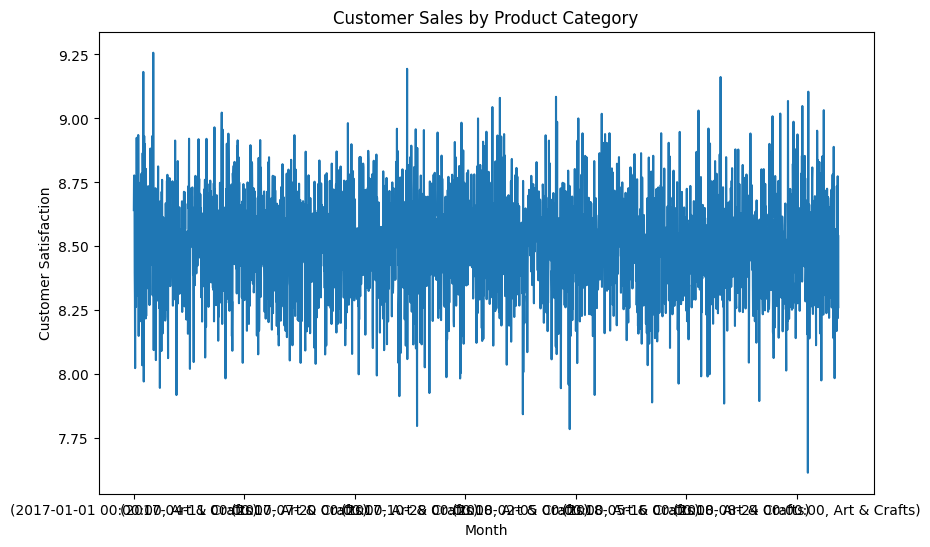

In [282]:
category_sales = maven_df.groupby(['Date', 'Product_Category'])['Customer_Satisfaction'].mean()

plt.figure(figsize=(10, 6))
category_sales.plot(kind='line', ax=plt.gca())
plt.title('Customer Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Customer Satisfaction')
plt.show()


In [283]:
# Find the top 10 products with the highest customer satisfaction
top_products = maven_df.groupby('Product_Name')['Customer_Satisfaction'].describe().sort_values(by='mean',ascending=False).head(10)

maven_df.groupby('Store_Name')['Customer_Satisfaction'].describe().sort_values(by='mean',ascending=False).head(10)


,count,mean,std,min,25%,50%,75%,max
Store_Name,,,,,,,,
Maven Toys Guanajuato 2,16494.0,9.388020,0.927123,0.0,9.0,10.0,10.0,10.0
Maven Toys Aguascalientes 1,14588.0,9.371744,1.026122,0.0,9.0,10.0,10.0,10.0
Maven Toys Hermosillo 1,15264.0,9.362159,1.092762,0.0,9.0,10.0,10.0,10.0
Maven Toys La Paz 1,13217.0,9.302111,1.037022,0.0,9.0,10.0,10.0,10.0
Maven Toys Puebla 3,14868.0,9.235472,1.512323,0.0,9.0,10.0,10.0,10.0
Maven Toys Oaxaca 1,13957.0,9.186000,1.191807,0.0,9.0,9.0,10.0,10.0
Maven Toys Toluca 2,12776.0,9.184721,1.173486,0.0,9.0,9.0,10.0,10.0
Maven Toys Xalapa 2,18809.0,9.178372,1.236294,0.0,9.0,9.0,10.0,10.0
Maven Toys Chetumal 1,14644.0,9.113152,1.687688,0.0,9.0,10.0,10.0,10.0


In [284]:

maven_df.groupby('Store_City')['Customer_Satisfaction'].describe().sort_values(by='mean',ascending=False).head(10)


,count,mean,std,min,25%,50%,75%,max
Store_City,,,,,,,,
Aguascalientes,14588.0,9.371744,1.026122,0.0,9.0,10.0,10.0,10.0
La Paz,13217.0,9.302111,1.037022,0.0,9.0,10.0,10.0,10.0
Oaxaca,13957.0,9.186000,1.191807,0.0,9.0,9.0,10.0,10.0
Chetumal,14644.0,9.113152,1.687688,0.0,9.0,10.0,10.0,10.0
Chilpancingo,14592.0,9.029537,1.670440,0.0,9.0,9.0,10.0,10.0
Tuxtla Gutierrez,14618.0,8.966753,2.170218,0.0,9.0,10.0,10.0,10.0
Guanajuato,49220.0,8.900935,2.230573,0.0,9.0,10.0,10.0,10.0
Xalapa,33807.0,8.864880,1.545144,0.0,8.0,9.0,10.0,10.0
Saltillo,33090.0,8.779420,2.476515,0.0,9.0,10.0,10.0,10.0


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

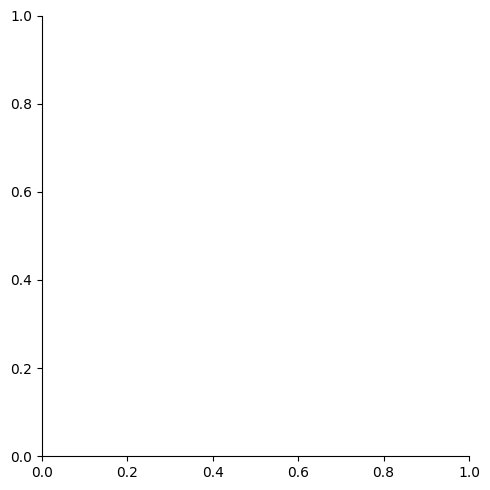

In [285]:
sns.displot(data=maven_df, x='Customer_Satisfaction', hue='Product_Name', bins=10, kde=False)


In [ ]:
# Find the most popular product categories
top_categories = maven_df.groupby('Product_Category')['Units'].sum().sort_values(ascending=False)
top_categories

Product_Category
Art & Crafts         325574
Toys                 267200
Games                194673
Sports & Outdoors    169043
Electronics          134075
Name: Units, dtype: int64

In [ ]:
# Compare the sales of the stores in Guadalajara to the sales of stores in other areas
area_sales = maven_df.groupby('Store_Location')['Units'].sum().sort_values(ascending=False)
area_sales

Store_Location
Downtown       628073
Commercial     240648
Residential    125402
Airport         96442
Name: Units, dtype: int64

In [ ]:
# Check the unique values in the 'Store_Name' column
maven_df['Store_Name'].unique()

array(['Maven Toys Ciudad de Mexico 2', 'Maven Toys Guadalajara 3',
       'Maven Toys Monterrey 3', 'Maven Toys Campeche 2',
       'Maven Toys Chihuahua 1', 'Maven Toys Ciudad de Mexico 4',
       'Maven Toys Guadalajara 2', 'Maven Toys Guanajuato 2',
       'Maven Toys Hermosillo 3', 'Maven Toys Mexicali 1',
       'Maven Toys Monterrey 4', 'Maven Toys Puebla 1',
       'Maven Toys Saltillo 2', 'Maven Toys Toluca 2',
       'Maven Toys Xalapa 1', 'Maven Toys Aguascalientes 1',
       'Maven Toys Campeche 1', 'Maven Toys Chetumal 1',
       'Maven Toys Chihuahua 2', 'Maven Toys Chilpancingo 1',
       'Maven Toys Ciudad de Mexico 1', 'Maven Toys Ciudad Victoria 1',
       'Maven Toys Cuernavaca 1', 'Maven Toys Culiacan 1',
       'Maven Toys Durango 1', 'Maven Toys Guadalajara 4',
       'Maven Toys Guanajuato 1', 'Maven Toys Hermosillo 2',
       'Maven Toys La Paz 1', 'Maven Toys Merida 1',
       'Maven Toys Mexicali 2', 'Maven Toys Monterrey 2',
       'Maven Toys Morelia 1', 'Ma

In [ ]:
# Extract the city name from the 'Store_Name' column
maven_df['City'] = maven_df['Store_Name'].str.split(' ').str[2]

# Compare the sales of the stores in Guadalajara to the sales of stores in other cities
city_sales = maven_df.groupby('City')['Units'].sum().sort_values(ascending=False)
city_sales

City
Ciudad            146100
Guadalajara        96454
Monterrey          93730
Hermosillo         66816
Guanajuato         64317
Puebla             61171
Toluca             48632
Mexicali           44415
Xalapa             44223
Saltillo           42903
Campeche           40833
Chihuahua          40396
Villahermosa       20934
Morelia            20895
Santiago           20286
Culiacan           19909
Tuxtla             19773
San                19635
Pachuca            19185
Chetumal           18965
Oaxaca             18564
Merida             18328
Chilpancingo       18327
Aguascalientes     17865
Durango            17422
Zacatecas          17196
Cuernavaca         17074
La                 16217
Name: Units, dtype: int64

In [ ]:
# Compare the sales of the individual stores in Guadalajara
guadalajara_stores = maven_df[maven_df['City'] == 'Guadalajara']
guadalajara_sales = guadalajara_stores.groupby('Store_Name')['Units'].sum().sort_values(ascending=False)
guadalajara_sales

Store_Name
Maven Toys Guadalajara 3    31609
Maven Toys Guadalajara 4    24136
Maven Toys Guadalajara 2    20698
Maven Toys Guadalajara 1    20011
Name: Units, dtype: int64

In [ ]:
# Calculate the average customer satisfaction
avg_satisfaction = maven_df['Customer_Satisfaction'].mean()
avg_satisfaction

8.503182463789031

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Remove the dollar sign from the 'Product_Price' column and convert it to float
maven_df['Product_Price'] = maven_df['Product_Price'].str.replace('$', '').astype(float)

# Create a scatter plot of 'Product_Price' and 'Customer_Satisfaction'
plt.figure(figsize=(10, 6))
plt.scatter(maven_df['Product_Price'], maven_df['Customer_Satisfaction'], alpha=0.5)
plt.title('Customer Satisfaction vs Product Price')
plt.xlabel('Product Price')
plt.ylabel('Customer Satisfaction')
plt.show()

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Calculate the average customer satisfaction for each payment type
payment_satisfaction = maven_df.groupby('Sale_Payment_Type')['Customer_Satisfaction'].mean().sort_values(ascending=False)
payment_satisfaction

Sale_Payment_Type
credit    8.523458
cash      8.459726
Name: Customer_Satisfaction, dtype: float64

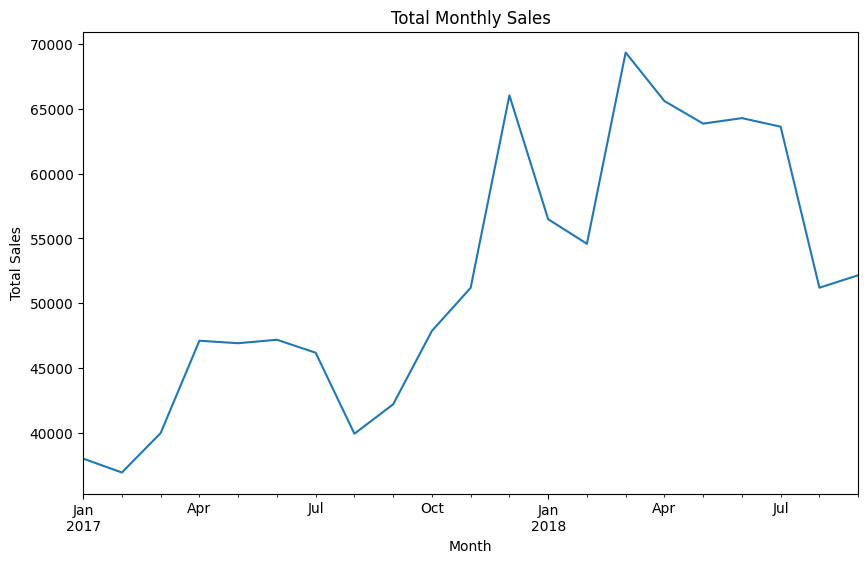

In [ ]:
# Extract the month and year from the 'Date' column
maven_df['YearMonth'] = maven_df['Date'].dt.to_period('M')

# Calculate the total sales for each month
monthly_sales = maven_df.groupby('YearMonth')['Units'].sum()

# Create a line plot of the total monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

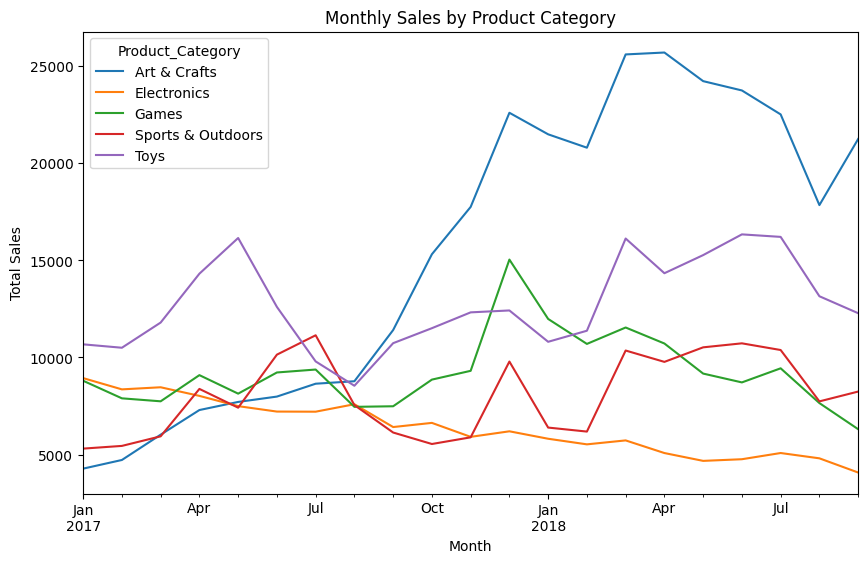

In [ ]:
# Calculate the monthly sales for each product category
category_sales = maven_df.groupby(['YearMonth', 'Product_Category'])['Units'].sum().unstack()

# Create a line plot of the monthly sales for each product category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='line', ax=plt.gca())
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

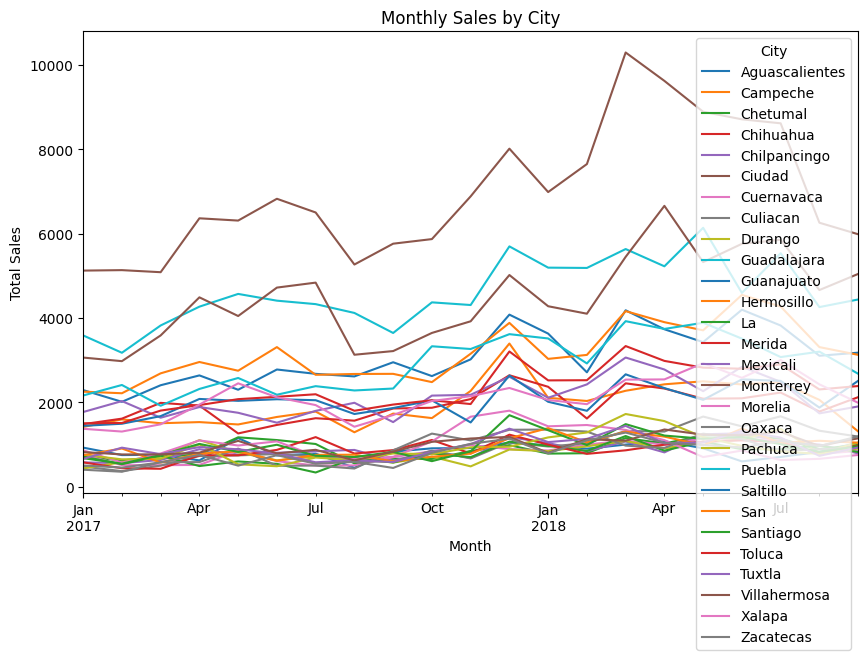

In [ ]:
# Calculate the monthly sales for each city
city_sales = maven_df.groupby(['YearMonth', 'City'])['Units'].sum().unstack()

# Create a line plot of the monthly sales for each city
plt.figure(figsize=(10, 6))
city_sales.plot(kind='line', ax=plt.gca())
plt.title('Monthly Sales by City')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

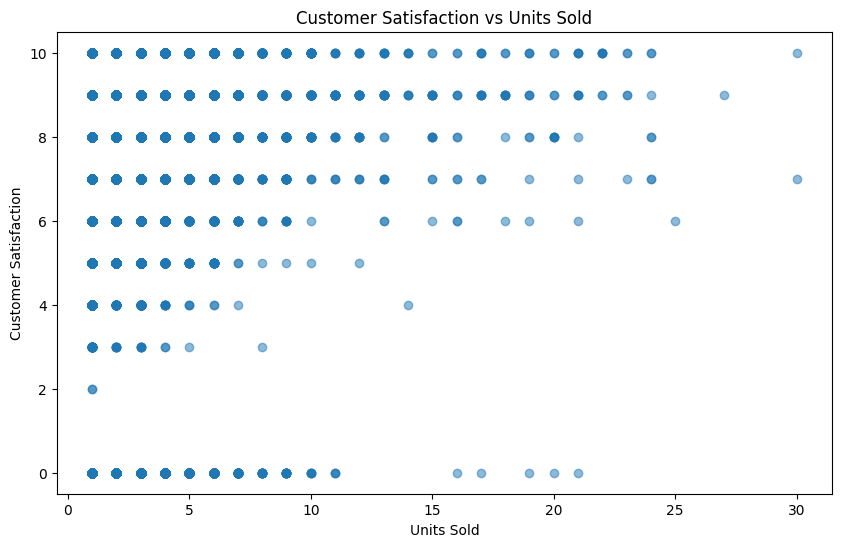

In [ ]:
# Create a scatter plot of 'Customer_Satisfaction' and 'Units'
plt.figure(figsize=(10, 6))
plt.scatter(maven_df['Units'], maven_df['Customer_Satisfaction'], alpha=0.5)
plt.title('Customer Satisfaction vs Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Customer Satisfaction')
plt.show()

# Model Preparation, Fitting, and Testing

In [287]:
dummy_df = pd.get_dummies(maven_df, 
        columns=['Store_Location', 'Product_Category', 'Sale_Payment_Type', 'Store_City', 'Customer_Reference'])

maven_df = pd.concat([maven_df, dummy_df], axis=1)




,Store_Name,Product_Price,Product_Cost,Date,Units,Product_Name,Customer_Satisfaction,Sale_ID,Store_ID,Product_ID,...,Store_City_Toluca,Store_City_Tuxtla Gutierrez,Store_City_Villahermosa,Store_City_Xalapa,Store_City_Zacatecas,Customer_Reference_Billboard Ad,Customer_Reference_No Answer,Customer_Reference_Social Media Ad,Customer_Reference_TV Ad,Customer_Reference_Word of Mouth
0,Maven Toys Ciudad de Mexico 2,39.99,34.99,2017-05-31,1,Lego Bricks,9.0,161215,31,18,...,False,False,False,False,False,False,False,True,False,False
1,Maven Toys Ciudad de Mexico 2,25.99,20.99,2018-06-04,1,Toy Robot,7.0,656852,31,34,...,False,False,False,False,False,False,False,False,False,True
2,Maven Toys Ciudad de Mexico 2,10.99,5.99,2017-06-05,1,Glass Marbles,10.0,168348,31,14,...,False,False,False,False,False,False,False,True,False,False
3,Maven Toys Ciudad de Mexico 2,20.99,14.99,2018-03-09,1,Gamer Headphones,9.0,514679,31,13,...,False,False,False,False,False,False,False,False,False,True
4,Maven Toys Ciudad de Mexico 2,6.99,3.99,2018-02-22,1,Deck Of Cards,8.0,494770,31,8,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,Maven Toys Puebla 3,2.99,1.99,2018-05-15,3,PlayDoh Can,9.0,625020,44,25,...,False,False,False,False,False,False,False,True,False,False
829258,Maven Toys Puebla 3,6.99,3.99,2017-07-17,1,Deck Of Cards,9.0,217169,44,8,...,False,False,False,False,False,False,False,False,False,True
829259,Maven Toys Puebla 3,4.99,3.99,2017-07-08,1,PlayDoh Toolkit,10.0,206813,44,27,...,False,False,False,False,False,False,False,True,False,False
829260,Maven Toys Puebla 3,19.99,14.99,2018-04-02,1,Nerf Gun,9.0,556796,44,24,...,False,False,False,False,False,False,False,True,False,False


# Model Evaluation

# Final Insights

EDA: 